In [1]:
# # https://mmcv.readthedocs.io/en/latest/get_started/installation.html 설치 과정 참조.  
# !pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu110/torch1.7.0/index.html

# !git clone https://github.com/open-mmlab/mmdetection.git
# !cd mmdetection; python setup.py install

In [2]:
from mmdet.apis import init_detector, inference_detector
import mmcv

In [3]:
import torch

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.7.0 (NVIDIA GeForce RTX 3060 Ti)


In [4]:
import os
# 이미지 별로 고유한 이미지명을 가지는 이미지 디렉토리를 가지고 이 디렉토리에 하위 디렉토리로 images, masks를 가짐
# images 에는 하나의 이미지가 있으며 masks는 여러개의 mask 이미지 파일을 가지고 있음. 즉 하나의 이미지에 여러개의 mask 파일을 가지고 있는 형태임. 
# os.walk(direcotry)는 3개의 값을 반환 os.walk(direcotry)[0]을 directory와 file들이 있는 sub directory path를 반환. 
# next(os.walk(directory))[1]은 sub directory를 iteration으로 반환 next(os.walk(directory))[2]는 해당 디렉토리 밑에 파일들을 iteration으로 반환

DATA_ROOT_DIR = 'content/nucleus'
index = 0 
for dir in sorted(next(os.walk(DATA_ROOT_DIR))[1]):
    print('',dir)
    subdirs = os.path.join(DATA_ROOT_DIR, dir)
    for subdir in sorted(next(os.walk(subdirs))[1]):
        print('  |--'+subdir)
        sub_subdirs = os.path.join(subdirs, subdir)
        for sub_subdir in sorted(next(os.walk(sub_subdirs))[2]):
            print('       |-- '+sub_subdir)
            index += 1
            if index >1000:
                break

 00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552
  |--images
       |-- 00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552.png
  |--masks
       |-- 07a9bf1d7594af2763c86e93f05d22c4d5181353c6d3ab30a345b908ffe5aadc.png
       |-- 0e548d0af63ab451616f082eb56bde13eb71f73dfda92a03fbe88ad42ebb4881.png
       |-- 0ea1f9e30124e4aef1407af239ff42fd6f5753c09b4c5cac5d08023c328d7f05.png
       |-- 0f5a3252d05ecdf453bdd5e6ad5322c454d8ec2d13ef0f0bf45a6f6db45b5639.png
       |-- 2c47735510ef91a11fde42b317829cee5fc04d05a797b90008803d7151951d58.png
       |-- 4afa39f2a05f9884a5ff030d678c6142379f99a5baaf4f1ba7835a639cb50751.png
       |-- 4bc58dbdefb2777392361d8b2d686b1cc14ca310e009b79763af46e853e6c6ac.png
       |-- 4e3b49fb14877b63704881a923365b68c1def111c58f23c66daa49fef4b632bf.png
       |-- 5522143fa8723b66b1e0b25331047e6ae6eeec664f7c8abeba687e0de0f9060a.png
       |-- 58656859fb9c13741eda9bc753c3415b78d1135ee852a194944dee88ab70acf4.png
       |-- 6442251746caac8fc255

  |--images
       |-- 449fe932622db3b49366a260ddd20077219f96fb2dc0f912ad4f60b087876f3b.png
  |--masks
       |-- 031e67374fb4e9b64cf544d8a5a2bc2efda358a4fa6ba50ea004829900d62b06.png
 44ab6a09eedee848b072ea3acd0f4e781f9c43b8d4e3d62598e1024584bf0b01
  |--images
       |-- 44ab6a09eedee848b072ea3acd0f4e781f9c43b8d4e3d62598e1024584bf0b01.png
  |--masks
       |-- 0742589d8334d92fec6574501508a235aa88848854f8fcc952175cca8debbe68.png
 4590d7d47f521df62f3bcb0bf74d1bca861d94ade614d8afc912d1009d607b94
  |--images
       |-- 4590d7d47f521df62f3bcb0bf74d1bca861d94ade614d8afc912d1009d607b94.png
  |--masks
       |-- 0003403e08f84bdd3536acfbed0cc42460674a9cd4d07173ace045aec2e346a0.png
 4596961c789d3b41916492918797724fe75128239fefc516c3ee75322b7926f0
  |--images
       |-- 4596961c789d3b41916492918797724fe75128239fefc516c3ee75322b7926f0.png
  |--masks
       |-- 012dde8e56f818c19815f5842f26e6c47c64f4f7eab7c91006530fcca97b90bc.png
 45c3bdef1819ba7029990e159f61543ed25781d13fb4dc5d4de52e803debd7d3
  |-

  |--images
       |-- b2c5d8653c621207e97b699e5c4c05d13df4f02d9db3e594b1f0c22e5b746aae.png
  |--masks
       |-- 03d009e1772d2963d7180c2852443cf1d192e371725dae4af910cbabc71b959f.png
 b3a9f4c9035a0df7e033b18c63bfb0f0d87ff5a4d9aa8bdf417159bb733abb80
  |--images
       |-- b3a9f4c9035a0df7e033b18c63bfb0f0d87ff5a4d9aa8bdf417159bb733abb80.png
  |--masks
       |-- 066c826c62a7499c5db2350087a74faa38abd28667e5f859612daa3837aca886.png
 b3b1626f8ad156acb2963d1faa6a368f9378a266c3b90d9321087fdc5b3032b4
  |--images
       |-- b3b1626f8ad156acb2963d1faa6a368f9378a266c3b90d9321087fdc5b3032b4.png
  |--masks
       |-- 0cec075660170e5562e1dc69d9290570eb3289ebebe8a90dd2fdf62ebc61527a.png
 b3bfd873fca7ff9b2e90f507dfdbe165bb8c153399b6ba5829aa59bae677a91d
  |--images
       |-- b3bfd873fca7ff9b2e90f507dfdbe165bb8c153399b6ba5829aa59bae677a91d.png
  |--masks
       |-- 229c16df3bb0afcc9343484c7032bf6006e3282c16185e0fd4e34bd4110cc23f.png
 b4d902d42c93dea77b541456f8d905f35eeb24fc3a5b0b15b5678d78e0aabe0c
  |-

In [5]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('content/mmdetection/configs'):
    print(dirname)
    for filename in filenames:
        print(os.path.join(dirname, filename))

content/mmdetection/configs
content/mmdetection/configs\albu_example
content/mmdetection/configs\albu_example\mask_rcnn_r50_fpn_albu_1x_coco.py
content/mmdetection/configs\albu_example\README.md
content/mmdetection/configs\atss
content/mmdetection/configs\atss\atss_r101_fpn_1x_coco.py
content/mmdetection/configs\atss\atss_r50_fpn_1x_coco.py
content/mmdetection/configs\atss\metafile.yml
content/mmdetection/configs\atss\README.md
content/mmdetection/configs\autoassign
content/mmdetection/configs\autoassign\autoassign_r50_fpn_8x2_1x_coco.py
content/mmdetection/configs\autoassign\metafile.yml
content/mmdetection/configs\autoassign\README.md
content/mmdetection/configs\carafe
content/mmdetection/configs\carafe\faster_rcnn_r50_fpn_carafe_1x_coco.py
content/mmdetection/configs\carafe\mask_rcnn_r50_fpn_carafe_1x_coco.py
content/mmdetection/configs\carafe\metafile.yml
content/mmdetection/configs\carafe\README.md
content/mmdetection/configs\cascade_rcnn
content/mmdetection/configs\cascade_rcnn\c

### Nucleus 데이터 살펴보기
### image 파일과 이에 매칭되는 mask 파일을 시각화
### image id, image와 mask 파일 절대 경로를 OS 디렉토리 구조에서 추출하는 함수 생성.

image shape:(256, 256, 3)
mask shape:(256, 256, 3)
mask shape:(256, 256, 3)
mask shape:(256, 256, 3)
mask shape:(256, 256, 3)
mask shape:(256, 256, 3)


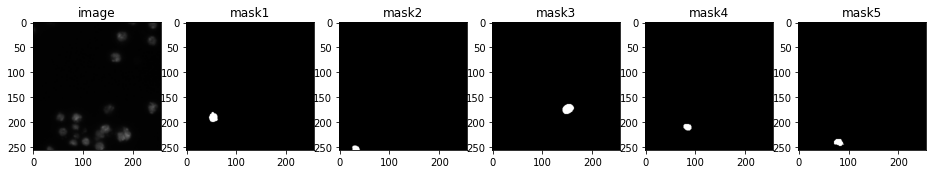

In [6]:
import matplotlib.pyplot as plt
import cv2

image_file_name = 'content/nucleus/00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552/images/00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552.png'

mask_file_list = [
                  'content/nucleus/00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552/masks/07a9bf1d7594af2763c86e93f05d22c4d5181353c6d3ab30a345b908ffe5aadc.png',
                  'content/nucleus/00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552/masks/0e548d0af63ab451616f082eb56bde13eb71f73dfda92a03fbe88ad42ebb4881.png',
                  'content/nucleus/00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552/masks/0ea1f9e30124e4aef1407af239ff42fd6f5753c09b4c5cac5d08023c328d7f05.png',
                  'content/nucleus/00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552/masks/0f5a3252d05ecdf453bdd5e6ad5322c454d8ec2d13ef0f0bf45a6f6db45b5639.png',
                  'content/nucleus/00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552/masks/2c47735510ef91a11fde42b317829cee5fc04d05a797b90008803d7151951d58.png'
                  ]
                  
def show_image_masks(image_file_name, mask_file_list, cols=6):
  figure, axs = plt.subplots(nrows=1, ncols=cols, figsize=(16, 12))
  for i in range(cols):
    im_name = image_file_name if i ==0 else mask_file_list[i-1]
    im_array = cv2.cvtColor(cv2.imread(im_name), cv2.COLOR_BGR2RGB)
    print('{0:} shape:{1:}'.format('image' if i == 0 else 'mask', im_array.shape))
    axs[i].imshow(im_array)
    axs[i].set_title('image' if i == 0 else 'mask'+str(i))

show_image_masks(image_file_name, mask_file_list)

In [7]:
DATA_ROOT_DIR = 'content/nucleus'

# 디렉토리 형태인 모든 image id를 list로 추출. 
def get_imageid_list(data_root_dir):
  imageid_list = []
  # data_root_dir 밑에 있는 모든 sub directory 명을 추출. 
  for imageid in sorted(next(os.walk(data_root_dir))[1]):
      imageid_list.append(imageid)

  return imageid_list

# 모든 image 파일의 절대경로를 list로 추출. 
def get_imagename_list(data_root_dir):
  imagename_list = []
  # data_root_dir 밑에 있는 모든 image id 디렉토리의 서브 디렉토리 중 images 디렉토리 밑에 있는 image 파일 명을 절대 경로로 추출
  # data_root_dir -> image id dir -> images -> image 파일명 
  for dir in sorted(next(os.walk(data_root_dir))[1]):
      subdirs = os.path.join(data_root_dir, dir)
      image_dir = os.path.join(subdirs, 'images')
      for imagename in sorted(next(os.walk(image_dir))[2]):
        imagename_list.append(os.path.join(image_dir, imagename))
        
  return imagename_list

# 특정 image id 디렉토리 밑에 있는 mask 파일명을 절대 경로로 모두 추출.
# image_id dir -> masks -> 여러 mask 파일 명 
def get_maskname_list(image_id_dir):
  mask_dir = os.path.join(image_id_dir, 'masks')
  maskname_list = []
  for mask_filename in next(os.walk(mask_dir))[2]:
    if '.png' in mask_filename:
      maskname_list.append(os.path.join(mask_dir, mask_filename))
  
  return maskname_list


imageid_list = get_imageid_list(DATA_ROOT_DIR)
print('##### image id list #####')
for imageid in imageid_list[:3]:
  print(imageid)

maskname_list = get_maskname_list(os.path.join(DATA_ROOT_DIR, imageid_list[0]))
print('##### mask name list #####')
for maskname in maskname_list[:3]:
  print(maskname)

imagename_list = get_imagename_list(DATA_ROOT_DIR)
print('##### image name list #####')
for imagename in imagename_list[:3]:
  print(imagename)

##### image id list #####
00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552
003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1
00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e
##### mask name list #####
content/nucleus\00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552\masks\07a9bf1d7594af2763c86e93f05d22c4d5181353c6d3ab30a345b908ffe5aadc.png
content/nucleus\00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552\masks\0e548d0af63ab451616f082eb56bde13eb71f73dfda92a03fbe88ad42ebb4881.png
content/nucleus\00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552\masks\0ea1f9e30124e4aef1407af239ff42fd6f5753c09b4c5cac5d08023c328d7f05.png
##### image name list #####
content/nucleus\00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552\images\00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552.png
content/nucleus\003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1\images\003cee89357

image shape:(256, 256, 3)
mask shape:(256, 256, 3)
mask shape:(256, 256, 3)
mask shape:(256, 256, 3)
mask shape:(256, 256, 3)
mask shape:(256, 256, 3)


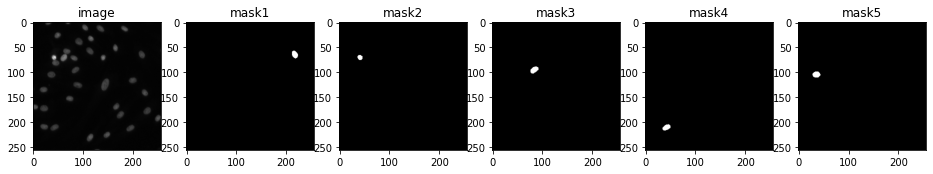

In [8]:
maskname_list = get_maskname_list(os.path.join(DATA_ROOT_DIR, imageid_list[1]))
show_image_masks(imagename_list[1],  maskname_list[:5], cols=6)

image shape:(256, 256, 3)
mask shape:(256, 256, 3)
mask shape:(256, 256, 3)
mask shape:(256, 256, 3)
mask shape:(256, 256, 3)
mask shape:(256, 256, 3)


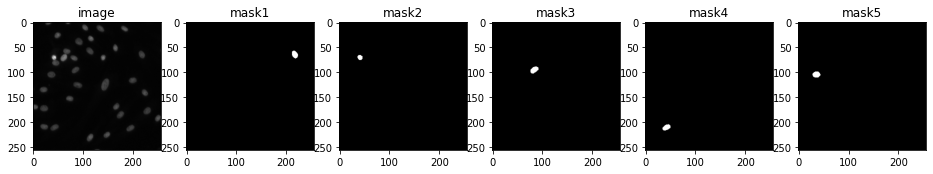

In [9]:
maskname_list = get_maskname_list(os.path.join(DATA_ROOT_DIR, imageid_list[1]))
show_image_masks(imagename_list[1],  maskname_list[:5], cols=6)

### Nucleus image의 유형별 분류 시각화
### brightfield/stained/fluorescence 와 같은 형태로 이미지가 부여됨
### 개별 이미지의 Hue(색상), Saturation(채도), Value(명도) 값에 따른 image clustering으로 유형별 분류

In [10]:
from sklearn.cluster import KMeans

# 개별 이미지의 hsv array
image_file_name = 'content/nucleus/00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552/images/00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552.png'
img_hsv = cv2.cvtColor(cv2.imread(image_file_name), cv2.COLOR_BGR2HSV)

# 단일 이미지의 픽셀값을 KMeans로 Clustering 하여 중심 centroid를 반환. 먼저 Kmeans 이용시 2d array 변환. 
img_hsv_2d = img_hsv.reshape((img_hsv.shape[0] * img_hsv.shape[1], img_hsv.shape[2]))
clt = KMeans(n_clusters = 1)
clt.fit(img_hsv_2d)
print('img hsv cluster_center:', clt.cluster_centers_)
print('img hsv array:', img_hsv_2d)

img hsv cluster_center: [[0.         0.         6.14222717]]
img hsv array: [[0 0 5]
 [0 0 5]
 [0 0 5]
 ...
 [0 0 2]
 [0 0 2]
 [0 0 2]]


In [11]:
from sklearn.cluster import KMeans
from tqdm.notebook import tqdm
import numpy as np

# 단일 이미지의 픽셀값을 KMeans로 Clustering 하여 중심 centroid를 반환. 
def get_cluster_center(img_hsv, n_cluster=1):
    # KMeans에 입력되기 위해서는 2d array가 되어야 함. 3d image array를 2d로 변환. 
    img_hsv_2d = img_hsv.reshape((img_hsv.shape[0] * img_hsv.shape[1], img_hsv.shape[2]))
    
    # 단일 이미지의 픽셀값 정보를 KMeans로 clustering 적용. 
    kmeans = KMeans(n_clusters = n_cluster)
    kmeans.fit(img_hsv_2d)
    # cluster 중심점 반환. 
    return kmeans.cluster_centers_ 

# image_name_list에 있는 모든 image 파일들의 중심 centroid 데이터 세트를 기반으로 3개의 clustering을 수행. 
def cluster_images_by_hsv(image_name_list, hsv_clusters=3):
    hsv_centers = []
    # image_name_list에 있는 image 파일들을 HSV 형태로 변환한 뒤, 개별 중심 Centroid를 구함. 
    for img_filename in tqdm(image_name_list):
      img_hsv = cv2.cvtColor(cv2.imread(img_filename), cv2.COLOR_BGR2HSV)
      cluster_center = get_cluster_center(img_hsv, n_cluster=1)
      # 중심 centroid정보는 2차원임. 이를 1차원으로 변환하고 hsv_centers에 추가. 
      hsv_centers.append(cluster_center.squeeze())
    # 모든 image에 대한 중심 centroid를 기반으로 3개의 군집화 수행. 
    hsv_centers_arr = np.array(hsv_centers)
    kmeans = KMeans(n_clusters=hsv_clusters).fit(hsv_centers_arr)
    # 모든 중심 centroid에 대해서 군집 결과(0, 1, 2) 예측 
    cluster_results = kmeans.predict(hsv_centers_arr)

    return cluster_results

In [12]:
pred_clusters = cluster_images_by_hsv(imagename_list, hsv_clusters=3)
print(pred_clusters, len(pred_clusters))

  0%|          | 0/670 [00:00<?, ?it/s]

[0 0 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 2 0 2 0 0
 2 0 2 2 0 0 0 0 0 0 0 0 2 0 0 2 0 0 2 0 0 2 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 2 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 2 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 2 0
 0 0 1 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 2 0 0 0 2 2 1 0 0 0 2 0 0
 0 0 2 0 0 0 2 0 0 0 0 0 2 0 0 0 0 2 2 0 2 0 0 0 2 0 1 0 2 2 0 0 0 0 0 0 2
 0 0 0 1 0 0 0 0 2 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1
 2 0 1 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 2 0 2 0 0 0 0 0 0
 2 0 2 0 0 0 0 0 0 0 2 2 2 0 0 0 2 0 0 1 0 0 0 2 0 2 0 0 0 0 0 2 0 0 0 0 0
 0 0 0 0 0 0 2 1 0 2 0 0 0 2 0 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 2 0 0 0 2 0 0 1 0 0 0 2 0 0 0 0 2 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 2 0 0 2 2 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 2 0 0 0 0 0 0 2 2 0 0
 2 0 0 0 0 2 0 0 0 0 2 0 0 2 0 0 2 0 2 2 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 2 

### image id와 image 절대 경로, mask 파일의 절대 경로, hsv cluster 결과값을 한번에 볼 수 있는 DataFrame 생성.
### DataFrame기반의 meta 정보 생성.
### 해당 DataFrame으로 이미지 시각화
### 해당 DataFrame을 기반으로 train과 validation 용 image id 분리

In [13]:
import pandas as pd

def make_meta_df(dataset_dir):
  # 모든 image id들의 list를 가져옴. 
  imageid_list = get_imageid_list(dataset_dir)
  # 모든 image 절대경로들의 list를 가져옴. 
  imagename_list = get_imagename_list(dataset_dir)
  # 개별 image당 모든 mask 절대 경로를 가져옴. 
  maskname_list_list = []
  for imageid in imageid_list:
    maskname_list = get_maskname_list(os.path.join(dataset_dir, imageid))
    maskname_list_list.append(maskname_list)

  # 모든 이미지에 대해서 HSV 기반의 Clustering 적용
  pred_clusters = cluster_images_by_hsv(imagename_list, hsv_clusters=3)
  meta_df = pd.DataFrame({'image_id': imageid_list,
                          'image_name': imagename_list,
                          'maskname_list': maskname_list_list,
                          'hsv_cluster': pred_clusters})
  return meta_df

meta_df = make_meta_df(DATA_ROOT_DIR)

  0%|          | 0/670 [00:00<?, ?it/s]

In [14]:
pd.set_option('display.max_colwidth', 300)
meta_df.head(3)

,image_id,image_name,maskname_list,hsv_cluster
0,00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552,content/nucleus\00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552\images\00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552.png,"[content/nucleus\00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552\masks\07a9bf1d7594af2763c86e93f05d22c4d5181353c6d3ab30a345b908ffe5aadc.png, content/nucleus\00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552\masks\0e548d0af63ab451616f082eb56bde13eb71f73dfda92a03fbe...",0
1,003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1,content/nucleus\003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1\images\003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1.png,"[content/nucleus\003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1\masks\1811379154b848c048f574745ed49e5dad19125e1a8c31b92ed2ee643ba04011.png, content/nucleus\003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1\masks\1c6f75a6b05988e48aacfde653b785a1885cb9b7b5f01657886...",0
2,00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e,content/nucleus\00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e\images\00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e.png,"[content/nucleus\00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e\masks\00521bc3b6a1339f9dd559e61757521ad98c4fce128ce4ab6f778fb647b16f02.png, content/nucleus\00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e\masks\01c32faf1b4b286415cae803cbd9aaa10bb5495352b3428dbda...",1


content/nucleus\00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552\images\00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552.png
['content/nucleus\\00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552\\masks\\07a9bf1d7594af2763c86e93f05d22c4d5181353c6d3ab30a345b908ffe5aadc.png', 'content/nucleus\\00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552\\masks\\0e548d0af63ab451616f082eb56bde13eb71f73dfda92a03fbe88ad42ebb4881.png', 'content/nucleus\\00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552\\masks\\0ea1f9e30124e4aef1407af239ff42fd6f5753c09b4c5cac5d08023c328d7f05.png', 'content/nucleus\\00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552\\masks\\0f5a3252d05ecdf453bdd5e6ad5322c454d8ec2d13ef0f0bf45a6f6db45b5639.png', 'content/nucleus\\00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552\\masks\\2c47735510ef91a11fde42b317829cee5fc04d05a797b90008803d7151951d58.png', 'content/nucleus\\00071198d059ba

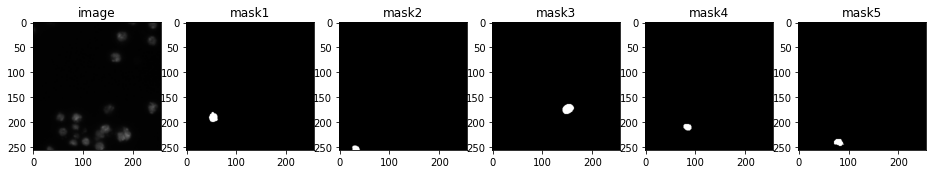

In [15]:
# hsv_cluster 유형에 따른 image와 mask 시각화. 
# 특정 hsv_cluster값으로 1개의 image와 이에 해당하는 mask 절대경로 추출. 
img_name_mask_df = meta_df[meta_df['hsv_cluster'] == 0][['image_name', 'maskname_list']].iloc[0, :]
imagename = img_name_mask_df['image_name']
maskname_list = img_name_mask_df['maskname_list']
print(imagename)
print(maskname_list)

show_image_masks(imagename, maskname_list[:5], cols=6)

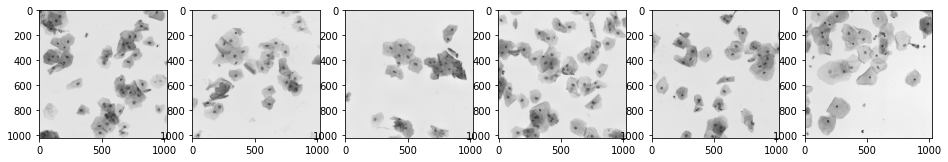

In [16]:
# 특정 hsv_cluster 값에 따라 여러개의 image들을 시각화
imagenames = meta_df[meta_df['hsv_cluster'] == 2]['image_name'].to_list()
figure, axs = plt.subplots(nrows=1, ncols=6, figsize=(16, 12))
for i in range(6):
  axs[i].imshow(cv2.cvtColor(cv2.imread(imagenames[i]), cv2.COLOR_BGR2RGB))

### mask 이미지 파일을 기반으로 segmentation polygon과 bbox정보를 추출
### opencv의 findContours()를 이용하여 외곽선 정보 추출하고, 이를 기반으로 coco segmentation polygon 생성
### segmentation 정보를 기반으로 bbox 정보 생성.

(256, 256, 3)


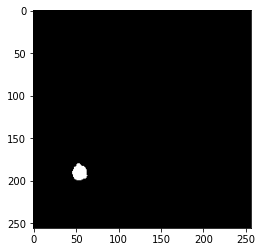

In [17]:
import matplotlib.pyplot as plt
import cv2

mask_file ='content/nucleus/00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552/masks/07a9bf1d7594af2763c86e93f05d22c4d5181353c6d3ab30a345b908ffe5aadc.png'
mask_array = cv2.imread(mask_file)
print(mask_array.shape)
plt.imshow(mask_array)

In [18]:
# findCountours()로 mask의 외곽선 좌표 추출. findContours()는 2차원 array로 입력 받을 수 있으므로 3차원 mask를 2차원으로 변환하여 입력.
contours, hierarchy = cv2.findContours(mask_array[:, :, 0], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#contours = [contour for contour in contours if contour.shape[0] > 2]
print(contours)

(array([[[ 52, 180]],

       [[ 51, 181]],

       [[ 51, 182]],

       [[ 49, 184]],

       [[ 48, 184]],

       [[ 48, 186]],

       [[ 47, 187]],

       [[ 47, 188]],

       [[ 46, 189]],

       [[ 46, 192]],

       [[ 47, 193]],

       [[ 47, 195]],

       [[ 48, 196]],

       [[ 48, 197]],

       [[ 49, 198]],

       [[ 50, 198]],

       [[ 51, 199]],

       [[ 56, 199]],

       [[ 57, 198]],

       [[ 58, 198]],

       [[ 59, 197]],

       [[ 61, 197]],

       [[ 62, 196]],

       [[ 62, 195]],

       [[ 63, 194]],

       [[ 62, 193]],

       [[ 62, 187]],

       [[ 61, 186]],

       [[ 61, 185]],

       [[ 59, 183]],

       [[ 57, 183]],

       [[ 54, 180]]], dtype=int32),)


In [19]:
contours[0].shape

(32, 1, 2)

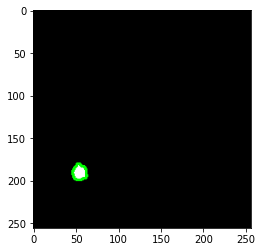

In [20]:
contoured_mask_array = cv2.drawContours(mask_array, contours, -1, (0, 255, 0), 2, cv2.LINE_8, hierarchy, 100)
plt.imshow(contoured_mask_array)

In [21]:
# ravel()은 다차원을 1차원으로 변환. 
a1 = np.array([[1,2],
               [3,4]])
a1.ravel()

array([1, 2, 3, 4])

In [22]:
print([s.ravel().tolist() for s in contours])

[[52, 180, 51, 181, 51, 182, 49, 184, 48, 184, 48, 186, 47, 187, 47, 188, 46, 189, 46, 192, 47, 193, 47, 195, 48, 196, 48, 197, 49, 198, 50, 198, 51, 199, 56, 199, 57, 198, 58, 198, 59, 197, 61, 197, 62, 196, 62, 195, 63, 194, 62, 193, 62, 187, 61, 186, 61, 185, 59, 183, 57, 183, 54, 180]]


In [23]:
mask_array = cv2.imread(
    'content/nucleus/ddf1bf458312de2895dd9cc5ce7ec9d334ad54c35edc96ad6001d20b1d8588d8/masks/5c69eea1e0d21c5973180d464a5ed62572d953a3917bb95d8e8c71915b29a194.png')
contours, hierarchy = cv2.findContours(
    mask_array[:, :, 0], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
if contours[0].shape[0] <= 2:
    print('####### contours[0] shape is less than 2 #######')
polygon = [s.ravel().tolist() for s in contours]
print(polygon)

[[0, 10, 0, 24, 9, 24, 10, 23, 10, 21, 11, 20, 11, 15, 10, 14, 10, 13, 8, 11, 5, 11, 4, 10]]


In [24]:
# bounding box 정보를 polygon에서 추출.
def get_bbox(segm):
    x_min = float("inf")
    y_min = float("inf")
    x_max = 0
    y_max = 0
    for s in segm:
        # segmentation polygon정보로 bounding box 정보 추출.
        x, y, w, h = cv2.boundingRect(s)
        x_b = x + w
        y_b = y + h
        # 최소 0보다 크고, 무한대 보다는 좌표값이 작아야 함.
        x_min = min(x_min, x)
        y_min = min(y_min, y)
        x_max = max(x_max, x_b)
        y_max = max(y_max, y_b)

    # 좌상단 좌표와, width, height 반환.
    return x_min, y_min, x_max - x_min, y_max - y_min

In [25]:
# mask image를 기반으로 segmentation polygon과 bbox 정보를 추출하는 로직 함수화
def get_annotation_info(mask_dir, mask_filename):
  mask_array = cv2.imread(os.path.join(mask_dir, mask_filename))
  contours, hierarchy = cv2.findContours(mask_array[:, :, 0], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  segm = [contour for contour in contours if contour.shape[0] > 2]
  polygons = [s.ravel().tolist() for s in contours]
  #check_polygon(polygons, mask_array.shape[0], mask_array.shape[1])
  xmin, ymin, bwidth, bheight = get_bbox(segm)
  return polygons, [xmin, ymin, bwidth, bheight]

polygons, bbox = get_annotation_info('content/nucleus/ddf1bf458312de2895dd9cc5ce7ec9d334ad54c35edc96ad6001d20b1d8588d8/masks', 
                                     '5c69eea1e0d21c5973180d464a5ed62572d953a3917bb95d8e8c71915b29a194.png')
print(polygons, bbox)

[[0, 10, 0, 24, 9, 24, 10, 23, 10, 21, 11, 20, 11, 15, 10, 14, 10, 13, 8, 11, 5, 11, 4, 10]] [0, 10, 12, 15]


# coco 포맷으로 변환하기
### images id 디렉토리를 기반으로 image_id 생성.
### 개별 image id의 images 디렉토리에서 개별 image 파일의 width, height 추출
### 개별 image id의 masks 디렉토리에서 여러 mask 파일들을 get_anntotation_info()로 polygon 형태의 segmentation과 bbox 정보 추출
### 개별 object의 id는 0부터 증가하는 순차적인 index로 생성.
### 별도의 coco image와 json 생성을 위한 디렉토리를 생성하고, meta_df를 이용하여 train, valid 용 coco json 생성.

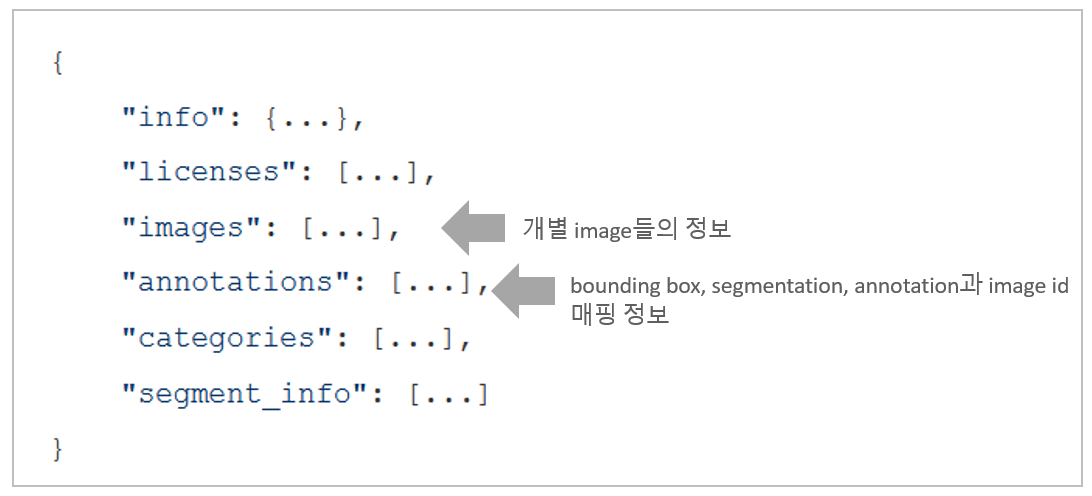

In [26]:
import cv2
import json


def convert_nucleus_to_coco(data_root_dir, image_ids, out_file):

    images = []
    annotations = []
    categories = []
    obj_index = 0
    # image 정보를 담아서 images list에 추가.
    for image_id in image_ids:
        image_id_dir = os.path.join(data_root_dir, image_id)
        image_path = os.path.join(image_id_dir, 'images/' + image_id + '.png')
        file_name = image_id + '.png'
        height, width = cv2.imread(image_path).shape[0:2]
        # 개별 image의 dict 정보 생성
        image_info = dict(file_name=file_name,
                          height=height,
                          width=width,
                          id=image_id)
        # 개별 image dict 정보를 images list에 추가.
        images.append(image_info)

        # 개별 image에 있는 여러 mask 이미지 파일을 segmentation, bbox로 변환하여 annotation dict 정보 생성.
        mask_dir = os.path.join(image_id_dir, 'masks')
        mask_filename_list = next(os.walk(mask_dir))[2]
        # 개별 image에 있는 여러 mask 이미지 파일을 기반으로 annotation dict 생성.
        for mask_filename in mask_filename_list:
            # 개별 mask 파일에서 polygon list와 bbbox list를 계산하여 반환.
            segmentation, bbox = get_annotation_info(mask_dir, mask_filename)

            # 만일 segmentation이 None이면 coco 데이터로 만들지 않음.
            if segmentation is None:
                continue
            annotation = dict(segmentation=segmentation,
                              area=bbox[2]*bbox[3],  # 반드시 계산 필요.
                              iscrowd=0,
                              bbox=bbox,
                              category_id=0,
                              image_id=image_id,
                              id=obj_index)
            # 계산된 annotation dict 정보를 annotations list에 추가.
            annotations.append(annotation)
            # object 고유 id 증가.
            obj_index += 1
        print('image id:', image_id, 'annotation is done')

    # images 와 annotations, categories list를 최종 Dict로 변환하고 json 형식으로 출력.
    coco_format_json = dict(
        images=images,
        annotations=annotations,
        categories=[{'id': 0, 'name': 'nucleus'}]
    )

    # json 파일로 출력.
    #mmcv.dump(coco_format_json, out_file)
    with open(out_file, 'w') as json_out_file:
        json.dump(coco_format_json, json_out_file)

In [27]:
# https://github.com/open-mmlab/mmdetection/blob/master/mmdet/datasets/pipelines/loading.py def _poly2mask(self, mask_ann, img_h, img_w):
import pycocotools.mask as maskUtils


def check_polygons(mask_filepath, polygons, img_h, img_w):
    try:
        rles = maskUtils.frPyObjects(polygons, img_h, img_w)
        rle = maskUtils.merge(rles)
    except Exception as e:
        print('##### 오류 polygon 발생 #####:',  e, polygons)
        print('오류 mask file명:', mask_filepath)

In [28]:
# mask image를 기반으로 segmentation polygon과 bbox 정보를 추출하는 로직 함수화
def get_annotation_info(mask_dir, mask_filename):
    mask_filepath = os.path.join(mask_dir, mask_filename)
    mask_array = cv2.imread(mask_filepath)
    contours, hierarchy = cv2.findContours(
        mask_array[:, :, 0], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    segm = [contour for contour in contours if contour.shape[0] > 2]
    polygons = [s.ravel().tolist() for s in contours]
    #polygons = [s.ravel().tolist() for s in segm]
    check_polygons(mask_filepath, polygons,
                   mask_array.shape[0], mask_array.shape[1])
    xmin, ymin, bwidth, bheight = get_bbox(segm)
    # 만약 polygons가 Null이면 segmentation과 bbox annotation을 None으로 반환.
    if polygons == []:
        return None, None
    # polygons가 Null이 아니면 정상적으로 segmentation과 bbox annotation 반환.
    else:
        return polygons, [xmin, ymin, bwidth, bheight]

In [29]:
# !mkdir content/coco_output

In [30]:
# 학습과 검증용 image id 데이터들을 추출. 
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(meta_df, test_size=0.1, stratify=meta_df['hsv_cluster'], random_state=2021)

train_ids = train_df['image_id'].to_list()
val_ids = val_df['image_id'].to_list()

In [31]:
convert_nucleus_to_coco('content/nucleus', train_ids, 'content/coco_output/train_coco.json')
convert_nucleus_to_coco('content/nucleus', val_ids, 'content/coco_output/val_coco.json')

image id: 815524d88283ba10ad597b87aa1967671db776df8004a0c4291b67fc2624c22a annotation is done
##### 오류 polygon 발생 #####: Argument 'bb' has incorrect type (expected numpy.ndarray, got list) [[0, 147, 0, 181]]
오류 mask file명: content/nucleus\02903040e19ddf92f452907644ad3822918f54af41dd85e5a3fe3e1b6d6f9339\masks\ee43930956917b35e8ea9950119904ee43eeaf297ae2d0999a96bce06465119b.png
image id: 02903040e19ddf92f452907644ad3822918f54af41dd85e5a3fe3e1b6d6f9339 annotation is done
image id: 89be66f88612aae541f5843abcd9c015832b5d6c54a28103b3019f7f38df8a6d annotation is done
image id: 93cfd412c7de5210bbd262ec3a602cfea65072e9272e9fce9b5339a5b9436eb7 annotation is done
image id: 8e8a7a14749d0b2e48de3d10e2e80063f17b165ad921c8afc0623f08500f3259 annotation is done
image id: 6bd18a218d25247dc456aed124c066a6397fb93086e860e4d04014bfa9c9555d annotation is done
image id: 9a71a416f98971aa14f63ef91242654cc9191a1414ce8bbd38066fe94559aa4f annotation is done
image id: 2ad489c11ed8b77a9d8a2339ac64ffc38e79281c03a2507

image id: da5f98f2b8a64eee735a398de48ed42cd31bf17a6063db46a9e0783ac13cd844 annotation is done
image id: 317832f90f02c5e916b2ac0f3bcb8da9928d8e400b747b2c68e544e56adacf6b annotation is done
image id: ae9f76b5360df3f60f3cdd389652b96e823080bb830dd8c79e7f1e597d51bc1c annotation is done
image id: ce37f6dd0615d45e66e41a8f2ed6fbc0bbe3103a290394ad474207507710eacc annotation is done
image id: 8f6e49e474ebb649a1e99662243d51a46cc9ba0c9c8f1efe2e2b662a81b48de1 annotation is done
image id: cb4df20a83b2f38b394c67f1d9d4aef29f9794d5345da3576318374ec3a11490 annotation is done
image id: 5d21acedb3015c1208b31778561f8b1079cca7487399300390c3947f691e3974 annotation is done
image id: 608ff81c8a0c8b622f6648a9c7f935d85f0c503f515ef2ac3728387be1953ee8 annotation is done
image id: f9ac03b0344ce8c48bc058448541f9211a1e5f4c94fdaf633dd534328d8610ab annotation is done
image id: 76c4f14e35210f87a29e93c46dbb25c8f5dc5c04d1d3134672708bcdfbc7e959 annotation is done
image id: 1740b0a67ca337ea31648b57c81bcfbb841c7bb5cad185199a

image id: f29fd9c52e04403cd2c7d43b6fe2479292e53b2f61969d25256d2d2aca7c6a81 annotation is done
image id: c395870ad9f5a3ae651b50efab9b20c3e6b9aea15d4c731eb34c0cf9e3800a72 annotation is done
image id: 58c593bcb98386e7fd42a1d34e291db93477624b164e83ab2afa3caa90d1d921 annotation is done
image id: ad9d305cbf193d4250743ead466bdaefe910835d7e352c544e22320e8336f5c1 annotation is done
image id: f7eaaf420b5204c4a42577428b7cd897a53ef07b759ccbba3ed30a3548ca5605 annotation is done
image id: 5ba4facefc949c920d7054813a3e846b000969da2ed860148bdfd18456f59bcc annotation is done
image id: 7f4d7b549d0f1a110191e2aded872943d85892bc30667f19fe9de97a5370b08e annotation is done
image id: a3a65623e079af7988b0c1cf1e54041003c6d730c91ecf200b71c47b93a67ed6 annotation is done
image id: 958114e5f37d5e1420b410bd716753b3e874b175f2b6958ebf1ec2bdf776e41f annotation is done
image id: 8a26b134fe9343c0c794513dae7787b7ac1debec3bb2a7096ab0b874a31d8175 annotation is done
image id: 673baf65ae5c571d6be452eb41e79ef3fc2eb3fd238e621c6b

image id: 5afb7932e9c7328f4fb1d7a8166a3699d6cdc5192b93758a75e9956f1513c5a3 annotation is done
image id: bfe8ef193a68a0a86a5e4ae1ddc27bda3f9ffe170494395be4030ba72737c565 annotation is done
image id: 65c8527c16a016191118e8adc3d307fe3a73d37cbe05597a95aebd75daf8d051 annotation is done
image id: e5aeb5b3577abbebe8982b5dd7d22c4257250ad3000661a42f38bf9248d291fd annotation is done
image id: 1631352dbafb8a90f11219fffd3bea368a30bc3bad3bbe0e84e19bd720df4945 annotation is done
image id: 1a11552569160f0b1ea10bedbd628ce6c14f29edec5092034c2309c556df833e annotation is done
image id: 3ca8181367fc1258a418f7bf5044533c83e02a59c1a96def043295c429c297a8 annotation is done
image id: dae976f161fe42dc58dee87d4bf2eb9f65736597cab0114138641b2a39a5c42b annotation is done
image id: ec486143ecfec847c22cd8cbc207d85312bcf38e61c9b9a805e0d12add62da8d annotation is done
##### 오류 polygon 발생 #####: Argument 'bb' has incorrect type (expected numpy.ndarray, got list) [[421, 519, 467, 519]]
오류 mask file명: content/nucleus\8d29c

image id: ecb36c90cdd20245d89173c106f3c6a2d124d07bdea0ae202fb1efa49b0cd169 annotation is done
image id: 5b2ccfb94dedf2ec8797c0404fc324888e35ab903c41bb26f070552033ca8e6c annotation is done
image id: 449f41710769584b5e4eca8ecb4c76d5272605f27da2949e6285de0860d2cbc0 annotation is done
image id: 3bfd6bb152310f93daa6f4e1867c10572946e874b3a30c9ba8e0fcdeb590300b annotation is done
image id: 53ad09e4348767bece0165884bf40c10b72ae18444e3f414a850442f02385efc annotation is done
image id: e81c758e1ca177b0942ecad62cf8d321ffc315376135bcbed3df932a6e5b40c0 annotation is done
image id: 4ca5081854df7bbcaa4934fcf34318f82733a0f8c05b942c2265eea75419d62f annotation is done
image id: 514ccfc78cb55988a238d3ac9dc83460aa88382c95d56bcc0559962d9fe481ef annotation is done
image id: b0e35e06b85da49bfe3ea737711a72b551a6add446e30eabb01aa683a79873c5 annotation is done
image id: 3441821ebea04face181c9e2f4d0d09727c764827ac51b9e7fbadbebabeab225 annotation is done
##### 오류 polygon 발생 #####: Argument 'bb' has incorrect type 

image id: 07761fa39f60dc37022dbbe8d8694595fd5b77ceb2af2a2724768c8e524d6770 annotation is done
image id: d32ea6d318626ca14a967d0c1ad3218aebfe636624a8d1173f5150dde8ff38cf annotation is done
image id: 5ef4442e5b8b0b4cf824b61be4050dfd793d846e0a6800afa4425a2f66e91456 annotation is done
image id: 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 annotation is done
image id: 56d0da5b663ddd49955478c00ca03118c367ff7dd6a646b8c875b0acb207d1c5 annotation is done
image id: ad473063dab4bf4f2461d9a99a9c0166d4871f156516d9e0a523484e7cf2258d annotation is done
image id: 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f annotation is done
image id: 62570c4ff1c5ab6d9d383aba9f25e604768520b4266afd40fdf4734a694c8bc3 annotation is done
image id: 309ba76b12ecb5ce28b99f3445b2b5dc54c0564c3c0e24c17e4c89a94a5d0535 annotation is done
image id: 3594684b9ea0e16196f498815508f8d364d55fea2933a2e782122b6f00375d04 annotation is done
image id: 6f8197baf738986a1ec3b6ba92b567863d897a739376b7cec5

image id: dd54adb80393de7769b9853c0aa2ee9b240905d0e99c59d4ccd99401f327aa05 annotation is done
image id: 05a8f65ebd0b30d3b210f30b4d640c847c2e710d0d135e0aeeaccbe1988e3b6e annotation is done
image id: 947c0d94c8213ac7aaa41c4efc95d854246550298259cf1bb489654d0e969050 annotation is done
image id: cc88627344305b9a9b07f8bd042cb074c7a834c13de67ff4b24914ac68f07f6e annotation is done
image id: e66f25e175abab08ecb4e5f6859db64a211e0ddffb262d7e727b9d9bd4aad2d2 annotation is done
image id: 670ebd9d674be236b9bf0b28650ad3f68e1891b06e16a9021fd069ca7ef32b78 annotation is done
image id: 87ea72894f6534b28e740cc34cf5c9eb75d0d8902687fce5fcc08a92e9f41386 annotation is done
image id: 1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b annotation is done
image id: 2c61fdcb36fd1b2944895af6204279e9f6c164ba894198b40c8b7a3c9bf500ea annotation is done
image id: b1eb0123fe2d8c825694b193efb7b923d95effac9558ee4eaf3116374c2c94fe annotation is done
image id: 5c235b945b25b9905b9b0429ce59f1db51d0d0c7d48c2c21ab

image id: 091944f1d2611c916b98c020bd066667e33f4639159b2a92407fe5a40788856d annotation is done
image id: b909aa8f6f4bec37c3fb6ff5a85d166162d07983506fcc57be742b0f9dbafbf7 annotation is done
image id: 7978812d0e2e034ee1f9c141f019705582fcaa290e4a01c6c75a62753285cb23 annotation is done
image id: 6034456567632f4b48dc3dfbb98534b5953c151990f4235df6c912c0a9c08397 annotation is done
image id: a65bbfc5673e8053b6ce49f39c79cf3a846fe5cc46dd93105f74fb07cf44606d annotation is done
image id: 60cb718759bff13f81c4055a7679e81326f78b6a193a2d856546097c949b20ff annotation is done
image id: 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 annotation is done
image id: 212b858a66f0d23768b8e3e1357704fc2f4cf4bbe7eed8cd59b5d01031d553e6 annotation is done
image id: 371a67232f7c871ec11332292c83cd9bb16063b91d58e86f0b76ef8817bc9465 annotation is done
image id: cf26c41245febfe67c2a1682cc4ee8752ee40ae3e49610314f45923b8bf5b08a annotation is done
image id: 003cee89357d9fe13516167fd67b609a164651b21934585648

image id: f26f4c2c70c38fe12e00d5a814d5116691f2ca548908126923fd76ddd665ed24 annotation is done
image id: e5384c905e9879cb6e8ff5250fb03155bc1db035d8dde458eece9078b7de8ff1 annotation is done
image id: be1916d0e5592c17f971315b5de720ef6894173087399daed94a52ef109c1572 annotation is done
image id: c322c72b9d411e631580fee9312885088b4bb14ed297aa4b246ec943533b3ffb annotation is done
image id: b67a6e5da8b1cfa5319d94a7d3f8b706725753346c37a4636bf7382e98b3c5df annotation is done
image id: 2255d5aba044256bb92f6b7cbed0fca46d972c7b6b1a59dcbe7f682c5777d074 annotation is done
image id: b0defa611b75645c0283464ee4163917bad382d335b61e8509f065bf371fa15f annotation is done
image id: bf7691b0a79811fa068b7408cbce636a73f01ef9e971a95da1a2d96df73782b6 annotation is done
image id: 9520aff4efe87bd8f3901652fa2dde9b4bc9c679325966145ce00c1ca33f35de annotation is done
image id: 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 annotation is done
image id: ef3ef194e5657fda708ecbd3eb6530286ed2ba23c88efb9f17

In [32]:
# !sudo apt-get install jq
# !choco install jq
# !jq . content/coco_output/val_coco.json > output_val_coco.json

In [33]:
import cv2
import json
import shutil

# mmdetection config에 맞추기 위해 nucleus 이미지 파일을 별도의 디렉토리로 이동하는 로직 추가


def convert_nucleus_to_coco(data_root_dir, image_ids, out_file, img_copy_dir):

    images = []
    annotations = []
    categories = []
    obj_index = 0
    # image 정보를 담아서 images list에 추가.
    for image_id in image_ids:
        image_id_dir = os.path.join(data_root_dir, image_id)
        image_path = os.path.join(image_id_dir, 'images/' + image_id + '.png')
        file_name = image_id + '.png'
        height, width = cv2.imread(image_path).shape[0:2]
        # 개별 image의 dict 정보 생성
        image_info = dict(file_name=file_name,
                          height=height,
                          width=width,
                          id=image_id)
        # 개별 image dict 정보를 images list에 추가.
        images.append(image_info)

        # 이미지를 특정 디렉토리 밑으로 모일 수 있도록 copy
        shutil.copy(image_path, os.path.join(img_copy_dir, file_name))

        # 개별 image에 있는 여러 mask 이미지 파일을 segmentation, bbox로 변환하여 annotation dict 정보 생성.
        mask_dir = os.path.join(image_id_dir, 'masks')
        mask_filename_list = next(os.walk(mask_dir))[2]
        # 개별 image에 있는 여러 mask 이미지 파일을 기반으로 annotation dict 생성.
        for mask_filename in mask_filename_list:
            # 개별 mask 파일에서 polygon list와 bbbox list를 계산하여 반환.
            segmentation, bbox = get_annotation_info(mask_dir, mask_filename)

            # 만일 segmentation이 None이면 coco 데이터로 만들지 않음.
            if segmentation is None:
                continue
            annotation = dict(segmentation=segmentation,
                              # 굳이 area를 계산할 필요가 없어서 0 처리
                              area=bbox[2] * bbox[3],
                              iscrowd=0,
                              bbox=bbox,
                              category_id=0,
                              image_id=image_id,
                              id=obj_index)
            # 계산된 annotation dict 정보를 annotations list에 추가.
            annotations.append(annotation)
            # object 고유 id 증가.
            obj_index += 1
        print('image id:', image_id, 'annotation is done')

    coco_format_json = dict(
        images=images,
        annotations=annotations,
        categories=[{'id': 0, 'name': 'nucleus'}]
    )

    # json 파일로 출력.
    #mmcv.dump(coco_format_json, out_file)
    with open(out_file, 'w') as json_out_file:
        json.dump(coco_format_json, json_out_file)

In [34]:
!mkdir content\coco_output\train
!mkdir content\coco_output\val

convert_nucleus_to_coco('content/nucleus', train_ids, 'content/coco_output/train_coco.json', 'content/coco_output/train')
convert_nucleus_to_coco('content/nucleus', val_ids, 'content/coco_output/val_coco.json', 'content/coco_output/val')

하위 디렉터리 또는 파일 content\coco_output\train이(가) 이미 있습니다.
하위 디렉터리 또는 파일 content\coco_output\val이(가) 이미 있습니다.


image id: 815524d88283ba10ad597b87aa1967671db776df8004a0c4291b67fc2624c22a annotation is done
##### 오류 polygon 발생 #####: Argument 'bb' has incorrect type (expected numpy.ndarray, got list) [[0, 147, 0, 181]]
오류 mask file명: content/nucleus\02903040e19ddf92f452907644ad3822918f54af41dd85e5a3fe3e1b6d6f9339\masks\ee43930956917b35e8ea9950119904ee43eeaf297ae2d0999a96bce06465119b.png
image id: 02903040e19ddf92f452907644ad3822918f54af41dd85e5a3fe3e1b6d6f9339 annotation is done
image id: 89be66f88612aae541f5843abcd9c015832b5d6c54a28103b3019f7f38df8a6d annotation is done
image id: 93cfd412c7de5210bbd262ec3a602cfea65072e9272e9fce9b5339a5b9436eb7 annotation is done
image id: 8e8a7a14749d0b2e48de3d10e2e80063f17b165ad921c8afc0623f08500f3259 annotation is done
image id: 6bd18a218d25247dc456aed124c066a6397fb93086e860e4d04014bfa9c9555d annotation is done
image id: 9a71a416f98971aa14f63ef91242654cc9191a1414ce8bbd38066fe94559aa4f annotation is done
image id: 2ad489c11ed8b77a9d8a2339ac64ffc38e79281c03a2507

image id: da5f98f2b8a64eee735a398de48ed42cd31bf17a6063db46a9e0783ac13cd844 annotation is done
image id: 317832f90f02c5e916b2ac0f3bcb8da9928d8e400b747b2c68e544e56adacf6b annotation is done
image id: ae9f76b5360df3f60f3cdd389652b96e823080bb830dd8c79e7f1e597d51bc1c annotation is done
image id: ce37f6dd0615d45e66e41a8f2ed6fbc0bbe3103a290394ad474207507710eacc annotation is done
image id: 8f6e49e474ebb649a1e99662243d51a46cc9ba0c9c8f1efe2e2b662a81b48de1 annotation is done
image id: cb4df20a83b2f38b394c67f1d9d4aef29f9794d5345da3576318374ec3a11490 annotation is done
image id: 5d21acedb3015c1208b31778561f8b1079cca7487399300390c3947f691e3974 annotation is done
image id: 608ff81c8a0c8b622f6648a9c7f935d85f0c503f515ef2ac3728387be1953ee8 annotation is done
image id: f9ac03b0344ce8c48bc058448541f9211a1e5f4c94fdaf633dd534328d8610ab annotation is done
image id: 76c4f14e35210f87a29e93c46dbb25c8f5dc5c04d1d3134672708bcdfbc7e959 annotation is done
image id: 1740b0a67ca337ea31648b57c81bcfbb841c7bb5cad185199a

image id: f81ca7ee25e733ff37240c34c8e3044d9937bb0166e315952ebde3f237ecb86f annotation is done
image id: 0bda515e370294ed94efd36bd53782288acacb040c171df2ed97fd691fc9d8fe annotation is done
image id: 7c0157913223365720209ac83ff2e0b1b2b460173acd615c67646014093a2b97 annotation is done
image id: 8de0b1a2e8f614af29fe5fafeaa5bdf55e6b3e65edf36355f19b707f7649ce2b annotation is done
image id: f29fd9c52e04403cd2c7d43b6fe2479292e53b2f61969d25256d2d2aca7c6a81 annotation is done
image id: c395870ad9f5a3ae651b50efab9b20c3e6b9aea15d4c731eb34c0cf9e3800a72 annotation is done
image id: 58c593bcb98386e7fd42a1d34e291db93477624b164e83ab2afa3caa90d1d921 annotation is done
image id: ad9d305cbf193d4250743ead466bdaefe910835d7e352c544e22320e8336f5c1 annotation is done
image id: f7eaaf420b5204c4a42577428b7cd897a53ef07b759ccbba3ed30a3548ca5605 annotation is done
image id: 5ba4facefc949c920d7054813a3e846b000969da2ed860148bdfd18456f59bcc annotation is done
image id: 7f4d7b549d0f1a110191e2aded872943d85892bc30667f19fe

##### 오류 polygon 발생 #####: Argument 'bb' has incorrect type (expected numpy.ndarray, got list) [[0, 90, 0, 113]]
오류 mask file명: content/nucleus\ac782d2cad7f515ce7276926209820e386248e3d619b2df81e22d5e3c160b7cb\masks\e707c768392b287baffc9307f2dc0d6a9993e40bcae8945caf0925bc789e4259.png
image id: ac782d2cad7f515ce7276926209820e386248e3d619b2df81e22d5e3c160b7cb annotation is done
image id: 0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c annotation is done
image id: 5afb7932e9c7328f4fb1d7a8166a3699d6cdc5192b93758a75e9956f1513c5a3 annotation is done
image id: bfe8ef193a68a0a86a5e4ae1ddc27bda3f9ffe170494395be4030ba72737c565 annotation is done
image id: 65c8527c16a016191118e8adc3d307fe3a73d37cbe05597a95aebd75daf8d051 annotation is done
image id: e5aeb5b3577abbebe8982b5dd7d22c4257250ad3000661a42f38bf9248d291fd annotation is done
image id: 1631352dbafb8a90f11219fffd3bea368a30bc3bad3bbe0e84e19bd720df4945 annotation is done
image id: 1a11552569160f0b1ea10bedbd628ce6c14f29edec509203

image id: ecb36c90cdd20245d89173c106f3c6a2d124d07bdea0ae202fb1efa49b0cd169 annotation is done
image id: 5b2ccfb94dedf2ec8797c0404fc324888e35ab903c41bb26f070552033ca8e6c annotation is done
image id: 449f41710769584b5e4eca8ecb4c76d5272605f27da2949e6285de0860d2cbc0 annotation is done
image id: 3bfd6bb152310f93daa6f4e1867c10572946e874b3a30c9ba8e0fcdeb590300b annotation is done
image id: 53ad09e4348767bece0165884bf40c10b72ae18444e3f414a850442f02385efc annotation is done
image id: e81c758e1ca177b0942ecad62cf8d321ffc315376135bcbed3df932a6e5b40c0 annotation is done
image id: 4ca5081854df7bbcaa4934fcf34318f82733a0f8c05b942c2265eea75419d62f annotation is done
image id: 514ccfc78cb55988a238d3ac9dc83460aa88382c95d56bcc0559962d9fe481ef annotation is done
image id: b0e35e06b85da49bfe3ea737711a72b551a6add446e30eabb01aa683a79873c5 annotation is done
image id: 3441821ebea04face181c9e2f4d0d09727c764827ac51b9e7fbadbebabeab225 annotation is done
##### 오류 polygon 발생 #####: Argument 'bb' has incorrect type 

image id: 07761fa39f60dc37022dbbe8d8694595fd5b77ceb2af2a2724768c8e524d6770 annotation is done
image id: d32ea6d318626ca14a967d0c1ad3218aebfe636624a8d1173f5150dde8ff38cf annotation is done
image id: 5ef4442e5b8b0b4cf824b61be4050dfd793d846e0a6800afa4425a2f66e91456 annotation is done
image id: 1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8 annotation is done
image id: 56d0da5b663ddd49955478c00ca03118c367ff7dd6a646b8c875b0acb207d1c5 annotation is done
image id: ad473063dab4bf4f2461d9a99a9c0166d4871f156516d9e0a523484e7cf2258d annotation is done
image id: 0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f annotation is done
image id: 62570c4ff1c5ab6d9d383aba9f25e604768520b4266afd40fdf4734a694c8bc3 annotation is done
image id: 309ba76b12ecb5ce28b99f3445b2b5dc54c0564c3c0e24c17e4c89a94a5d0535 annotation is done
image id: 3594684b9ea0e16196f498815508f8d364d55fea2933a2e782122b6f00375d04 annotation is done
image id: 6f8197baf738986a1ec3b6ba92b567863d897a739376b7cec5

image id: dd54adb80393de7769b9853c0aa2ee9b240905d0e99c59d4ccd99401f327aa05 annotation is done
image id: 05a8f65ebd0b30d3b210f30b4d640c847c2e710d0d135e0aeeaccbe1988e3b6e annotation is done
image id: 947c0d94c8213ac7aaa41c4efc95d854246550298259cf1bb489654d0e969050 annotation is done
image id: cc88627344305b9a9b07f8bd042cb074c7a834c13de67ff4b24914ac68f07f6e annotation is done
image id: e66f25e175abab08ecb4e5f6859db64a211e0ddffb262d7e727b9d9bd4aad2d2 annotation is done
image id: 670ebd9d674be236b9bf0b28650ad3f68e1891b06e16a9021fd069ca7ef32b78 annotation is done
image id: 87ea72894f6534b28e740cc34cf5c9eb75d0d8902687fce5fcc08a92e9f41386 annotation is done
image id: 1a75e9f15481d11084fe66bc2a5afac6dc5bec20ed56a7351a6d65ef0fe8762b annotation is done
image id: 2c61fdcb36fd1b2944895af6204279e9f6c164ba894198b40c8b7a3c9bf500ea annotation is done
image id: b1eb0123fe2d8c825694b193efb7b923d95effac9558ee4eaf3116374c2c94fe annotation is done
image id: 5c235b945b25b9905b9b0429ce59f1db51d0d0c7d48c2c21ab

image id: 091944f1d2611c916b98c020bd066667e33f4639159b2a92407fe5a40788856d annotation is done
image id: b909aa8f6f4bec37c3fb6ff5a85d166162d07983506fcc57be742b0f9dbafbf7 annotation is done
image id: 7978812d0e2e034ee1f9c141f019705582fcaa290e4a01c6c75a62753285cb23 annotation is done
image id: 6034456567632f4b48dc3dfbb98534b5953c151990f4235df6c912c0a9c08397 annotation is done
image id: a65bbfc5673e8053b6ce49f39c79cf3a846fe5cc46dd93105f74fb07cf44606d annotation is done
image id: 60cb718759bff13f81c4055a7679e81326f78b6a193a2d856546097c949b20ff annotation is done
image id: 0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2 annotation is done
image id: 212b858a66f0d23768b8e3e1357704fc2f4cf4bbe7eed8cd59b5d01031d553e6 annotation is done
image id: 371a67232f7c871ec11332292c83cd9bb16063b91d58e86f0b76ef8817bc9465 annotation is done
image id: cf26c41245febfe67c2a1682cc4ee8752ee40ae3e49610314f45923b8bf5b08a annotation is done
image id: 003cee89357d9fe13516167fd67b609a164651b21934585648

image id: f26f4c2c70c38fe12e00d5a814d5116691f2ca548908126923fd76ddd665ed24 annotation is done
image id: e5384c905e9879cb6e8ff5250fb03155bc1db035d8dde458eece9078b7de8ff1 annotation is done
image id: be1916d0e5592c17f971315b5de720ef6894173087399daed94a52ef109c1572 annotation is done
image id: c322c72b9d411e631580fee9312885088b4bb14ed297aa4b246ec943533b3ffb annotation is done
image id: b67a6e5da8b1cfa5319d94a7d3f8b706725753346c37a4636bf7382e98b3c5df annotation is done
image id: 2255d5aba044256bb92f6b7cbed0fca46d972c7b6b1a59dcbe7f682c5777d074 annotation is done
image id: b0defa611b75645c0283464ee4163917bad382d335b61e8509f065bf371fa15f annotation is done
image id: bf7691b0a79811fa068b7408cbce636a73f01ef9e971a95da1a2d96df73782b6 annotation is done
image id: 9520aff4efe87bd8f3901652fa2dde9b4bc9c679325966145ce00c1ca33f35de annotation is done
image id: 1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72 annotation is done
image id: ef3ef194e5657fda708ecbd3eb6530286ed2ba23c88efb9f17

### pycocotools를 이용하여 변환된 coco json의 segmentation 시각화
### coco format으로 잘 변환되었는지 확인하기 위해 pycocotools로 특정 image id의 image filename및 segmentation 정보를 추출한 뒤 이를 시각화

In [35]:
from pycocotools.coco import COCO

coco_val = COCO('content/coco_output/val_coco.json')

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


In [36]:
# category id와 image id 출력. 
catIds = coco_val.getCatIds(catNms=['nucleus']);
print(catIds)
# oco.getImgIds(catIds=catIds)는 해당 catogory id별로 한개의 image id을 임의로 출력
imgIds =coco_val.getImgIds(catIds=catIds )
print(imgIds)
print(len(imgIds))

[0]
['b1a239838c7dbb34ffea851ad537899f24da62f4e3f3fd6d835ff7b922f27313', 'a6001531274f9ad16e0ced40380f9667b9149558dea7053f7a7db18f5cd028c0', '077f026f4ab0f0bcc0856644d99cbf639e443ec4f067d7b708bc6cecac609424', '3a508d2dc03db46e7f97a2a30eabb62ab2886f3cedfea303de8f6a42e50d20eb', '54cb3328e778d87f76062b0550e3bc190f46384acd8efbe58c297265d1906e84', 'c322c72b9d411e631580fee9312885088b4bb14ed297aa4b246ec943533b3ffb', 'f26f4c2c70c38fe12e00d5a814d5116691f2ca548908126923fd76ddd665ed24', 'a6e81120d1cb9f71f8a25f90a5d56c4b714a642fc496a705e38921fd90a3f69c', '13c8ff1f49886e91c98ce795c93648ad8634c782ff57eb928ce29496b0425057', '1c2f9e121fc207efff79d46390df1a740566b683ff56a96d8cabe830a398dd2e', 'b61d3fb0d0ebbee018346e0adeff9e9178f33aa95262779b3c196f93b4ace895', '6fb82031f7fc5f4fa6e0bc2ef3421db19036b5c2cdd2725009ab465d66d61d72', 'd6a880b1f6056f3086679de5c810e7af87cdf3bbbd0533a83e3681817fce40fc', '0e4c2e2780de7ec4312f0efcd86b07c3738d21df30bb4643659962b4da5505a3', '0bf4b144167694b6846d584cf52c458f34f28fcae7

In [37]:
# image id에 대한 image 정보와 해당 image의 object별에 annotation 정보 추출. 
img = coco_val.loadImgs(val_ids)[0]
print(img['id'])
annIds = coco_val.getAnnIds(imgIds=[img['id']], catIds=[0], iscrowd=None)
print(annIds)
anns = coco_val.loadAnns(annIds)
print(anns)
print(len(anns))

1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]
[{'segmentation': [[769, 583, 767, 585, 767, 588, 770, 591, 773, 591, 774, 590, 774, 587, 775, 586, 775, 584, 774, 583]], 'area': 81, 'iscrowd': 0, 'bbox': [767, 583, 9, 9], 'category_id': 0, 'image_id': '1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df', 'id': 0}, {'segmentation': [[578, 498, 576, 500, 574, 500, 573, 501, 573, 504, 574, 504, 575, 505, 579, 505, 580, 504, 581, 504, 581, 503, 582, 502, 582, 500, 581, 499, 581, 498]], 'area': 80, 'iscrowd': 0, 'bbox': [573, 498, 10, 8], 'category_id': 0, 'image_id': '1b44d22643830cd4f23c9de

In [38]:
import numpy as np

# coco data 실습에 사용된 시각화 함수를 그대로 가져옴.


def get_polygon_xy(ann_seg):
    polygon_x = [x for index, x in enumerate(ann_seg) if index % 2 == 0]
    polygon_y = [x for index, x in enumerate(ann_seg) if index % 2 == 1]
    polygon_xy = [[x, y] for x, y in zip(polygon_x, polygon_y)]
    polygon_xy = np.array(polygon_xy, np.int32)
    return polygon_xy


def get_mask(image_array_shape, polygon_xy):
    mask = np.zeros(image_array_shape)
    masked_polygon = cv2.fillPoly(mask, [polygon_xy], 1)

    return masked_polygon


def apply_mask(image, mask, color, alpha=0.5):
    for c in range(3):
        image[:, :, c] = np.where(mask == 1,
                                  image[:, :, c] *
                                  (1 - alpha) + alpha * color[c] * 255,
                                  image[:, :, c])
    return image

# ann_seg_list에 있는 object들의 segmentation에 따라 instance segmentation 시각화.


def draw_segment(image_array, ann_seg_list, color_list, alpha):
    draw_image = image_array.copy()
    mask_array_shape = draw_image.shape[0:2]

    # list형태로 입력된 segmentation 정보들을 각각 시각화
    for index, ann_seg in enumerate(ann_seg_list):
        # polygon 좌표로 변환.
        polygon_xy = get_polygon_xy(ann_seg)
        # mask 정보 변환
        masked_polygon = get_mask(mask_array_shape, polygon_xy)

        # segmentation color와 외곽선용 color 선택
        color_object = color_list[np.random.randint(len(color_list))]
        color_contour = color_list[np.random.randint(len(color_list))]
        # masking 적용.
        masked_image = apply_mask(
            draw_image, masked_polygon, color_object, alpha=0.6)
        # 외곽선 적용.
        s_mask_int = (masked_polygon*255).astype("uint8")
        contours, hierarchy = cv2.findContours(
            s_mask_int, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        masked_image = cv2.drawContours(
            masked_image, contours, -1, color_contour, 1, cv2.LINE_8, hierarchy, 100)

    return masked_image

In [39]:
color_list = [
              (0, 255, 0),
              (255, 0, 0),
              (0, 0, 255)
]
anns = coco_val.loadAnns(annIds)
# segmentation 정보만 별도로 추출. 
ann_seg_list = [ann['segmentation'][0] for ann in anns]
print(ann_seg_list)
print(len(ann_seg_list))

[[769, 583, 767, 585, 767, 588, 770, 591, 773, 591, 774, 590, 774, 587, 775, 586, 775, 584, 774, 583], [578, 498, 576, 500, 574, 500, 573, 501, 573, 504, 574, 504, 575, 505, 579, 505, 580, 504, 581, 504, 581, 503, 582, 502, 582, 500, 581, 499, 581, 498], [779, 583, 779, 588, 780, 589, 783, 589, 784, 588, 784, 584, 783, 584, 782, 583], [45, 340, 44, 341, 43, 341, 44, 342, 43, 343, 42, 343, 42, 344, 41, 345, 40, 345, 41, 346, 41, 347, 40, 348, 37, 348, 38, 349, 37, 350, 36, 350, 40, 350, 41, 349, 42, 349, 45, 346, 45, 343, 46, 342, 46, 341], [90, 613, 89, 614, 86, 614, 84, 616, 83, 616, 80, 619, 80, 621, 79, 622, 79, 626, 81, 628, 81, 629, 83, 631, 83, 632, 86, 635, 87, 635, 88, 636, 89, 636, 90, 637, 91, 637, 92, 638, 98, 638, 99, 637, 100, 637, 101, 636, 102, 636, 104, 634, 104, 633, 105, 632, 105, 627, 103, 625, 103, 624, 101, 622, 101, 621, 99, 619, 98, 619, 97, 618, 96, 618, 93, 615, 92, 615], [431, 452, 430, 453, 427, 453, 426, 454, 423, 454, 422, 455, 421, 455, 420, 456, 419, 456,

1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df


(-0.5, 1023.5, 1023.5, -0.5)

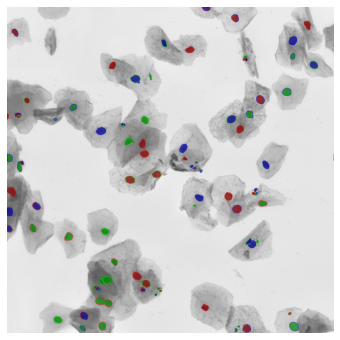

In [40]:
import matplotlib.pyplot as plt
import cv2

# 원본 이미지 시각화 
val_image_id = val_df['image_id'].iloc[0]
print(val_image_id)

annIds = coco_val.getAnnIds(imgIds=[val_image_id], catIds=[0], iscrowd=None)
anns = coco_val.loadAnns(annIds)
# segmentation 정보만 별도로 추출. 
ann_seg_list = [ann['segmentation'][0] for ann in anns]

val_image_name = val_df[val_df['image_id']==val_image_id]['image_name'].to_list()
image_array = cv2.cvtColor(cv2.imread(val_image_name[0]), cv2.COLOR_BGR2RGB)

# coco segmentation 정보를 기반으로 segmentation 적용한 이미지 시각화 
masked_image = draw_segment(image_array, ann_seg_list, color_list, alpha=0.6)
plt.figure(figsize=(6, 6))
plt.imshow(masked_image)
plt.axis('off')

loading annotations into memory...
Done (t=0.27s)
creating index...
index created!
loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


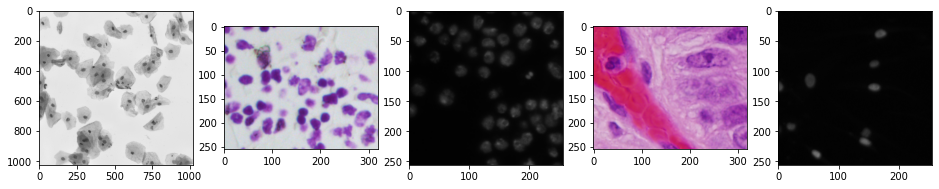

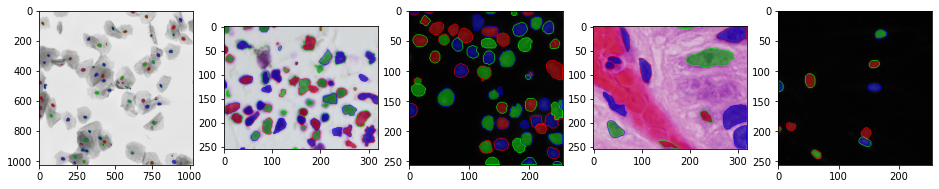

In [41]:
def get_coco_masked_image(coco, image_id, image_name):
  annIds = coco.getAnnIds(imgIds=[image_id], catIds=[0], iscrowd=None)
  anns = coco.loadAnns(annIds)
  # segmentation 정보만 별도로 추출. 
  ann_seg_list = [ann['segmentation'][0] for ann in anns]

  image_array = cv2.cvtColor(cv2.imread(image_name), cv2.COLOR_BGR2RGB)

  # coco segmentation 정보를 기반으로 segmentation 적용한 이미지 시각화 
  masked_image = draw_segment(image_array, ann_seg_list, color_list, alpha=0.6)

  return masked_image

def show_coco_masked_image(coco, data_df, image_id_list, cols=5):

  figure, axs = plt.subplots(nrows=1, ncols=cols, figsize=(16, 12))
  for i in range(cols):
    image_id = image_id_list[i]
    image_name = data_df[data_df['image_id'] == image_id]['image_name'].to_list()[0]
    masked_image = get_coco_masked_image(coco, image_id, image_name)

    axs[i].imshow(masked_image)

def show_coco_image(data_df, image_id_list, cols=5):

  figure, axs = plt.subplots(nrows=1, ncols=cols, figsize=(16, 12))
  for i in range(cols):
    image_id = image_id_list[i]
    image_name = data_df[data_df['image_id'] == image_id]['image_name'].to_list()[0]
    
    axs[i].imshow(cv2.cvtColor(cv2.imread(image_name), cv2.COLOR_BGR2RGB))

coco_train = COCO('content/coco_output/train_coco.json')
coco_val= COCO('content/coco_output/val_coco.json')

show_coco_image(val_df, val_ids[0:5], cols=5)  
show_coco_masked_image(coco_val, val_df, val_ids[0:5], cols=5)

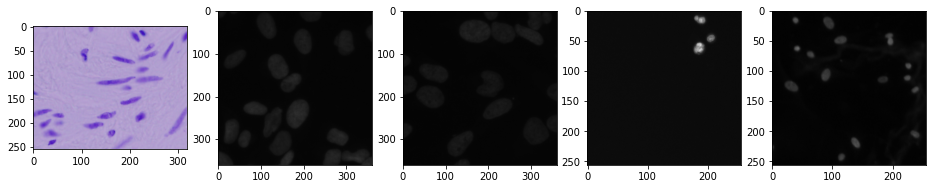

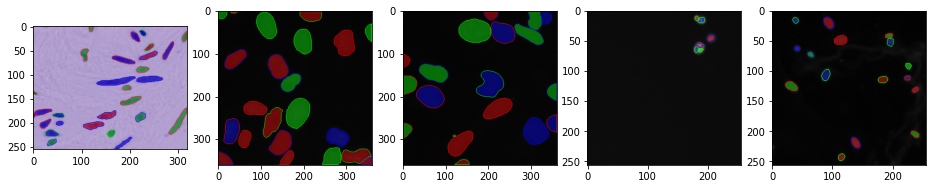

In [42]:
show_coco_image(train_df, train_ids[0:5], cols=5)  
show_coco_masked_image(coco_train, train_df, train_ids[0:5], cols=5)

### Pretrained 모델 다운로드, Config 설정

In [43]:
# # pretrained weight 모델을 다운로드 받기 위해서 mmdetection/checkpoints 디렉토리를 만듬. 
# !mkdir mmdetection/checkpoints

In [44]:
# !wget content/mmdetection/checkpoints/mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth http://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r101_fpn_1x_coco/mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth
# !ls -lia content/mmdetection/checkpoints

In [45]:
# config 파일을 설정하고, 다운로드 받은 pretrained 모델을 checkpoint로 설정. 
config_file = 'content/mmdetection/configs/mask_rcnn/mask_rcnn_r101_fpn_1x_coco.py'
checkpoint_file = 'content/mmdetection/checkpoints/mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth'

In [46]:
from mmdet.datasets.builder import DATASETS
from mmdet.datasets.coco import CocoDataset


@DATASETS.register_module(force=True)

class NucleusDataset(CocoDataset):
    CLASSES = ['nucleus']

In [47]:
from mmcv import Config

cfg = Config.fromfile(config_file)
print(cfg.pretty_text)

model = dict(
    type='MaskRCNN',
    backbone=dict(
        type='ResNet',
        depth=101,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=dict(type='Pretrained',
                      checkpoint='torchvision://resnet101')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', use_sigmoi

In [48]:
from mmdet.apis import set_random_seed

# dataset에 대한 환경 파라미터 수정. 
cfg.dataset_type = 'NucleusDataset'
cfg.data_root = './content/coco_output/'

# train, val, test dataset에 대한 type, data_root, ann_file, img_prefix 환경 파라미터 수정. 
cfg.data.train.type = 'NucleusDataset'
cfg.data.train.data_root = './content/coco_output/'
cfg.data.train.ann_file = 'train_coco.json'
cfg.data.train.img_prefix = 'train'

cfg.data.val.type = 'NucleusDataset'
cfg.data.val.data_root = './content/coco_output/'
cfg.data.val.ann_file = 'val_coco.json'
cfg.data.val.img_prefix = 'val'

# class의 갯수 수정. 
cfg.model.roi_head.bbox_head.num_classes = 1
cfg.model.roi_head.mask_head.num_classes = 1

# pretrained 모델
cfg.load_from = './content/mmdetection/checkpoints/mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth'

# 학습 weight 파일로 로그를 저장하기 위한 디렉토리 설정. 
cfg.work_dir = './tutorial_exps/'

# 학습율 변경 환경 파라미터 설정. 
cfg.optimizer.lr = 0.02 / 8
cfg.lr_config.warmup = None
cfg.log_config.interval = 10

# CocoDataset의 경우 metric을 bbox로 설정해야 함.(mAP아님. bbox로 설정하면 mAP를 iou threshold를 0.5 ~ 0.95까지 변경하면서 측정)
cfg.evaluation.metric = ['bbox', 'segm']
cfg.evaluation.interval = 12
cfg.checkpoint_config.interval = 12

# epochs 횟수는 36으로 증가 
#cfg.runner.max_epochs = 36 

# 두번 config를 로드하면 lr_config의 policy가 사라지는 오류로 인하여 설정. 
cfg.lr_config.policy='step'
# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)

In [49]:
print(cfg.pretty_text)

model = dict(
    type='MaskRCNN',
    backbone=dict(
        type='ResNet',
        depth=101,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=dict(type='Pretrained',
                      checkpoint='torchvision://resnet101')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', use_sigmoi

### 데이터 세트 내부 변수 값 확인 및 Train 수행
### build_dataset(config)로 생성된 Dataset의 내부 변수값을 확인.

In [50]:
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector

# train, valid 용 Dataset 생성. 
datasets_train = [build_dataset(cfg.data.train)]
datasets_val = [build_dataset(cfg.data.val)]

loading annotations into memory...
Done (t=0.29s)
creating index...
index created!
loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


In [51]:
datasets_train 

[
 NucleusDataset Train dataset with number of images 603, and instance counts: 
 +-------------+-------+----------+-------+----------+-------+----------+-------+----------+-------+
 | category    | count | category | count | category | count | category | count | category | count |
 +-------------+-------+----------+-------+----------+-------+----------+-------+----------+-------+
 |             |       |          |       |          |       |          |       |          |       |
 | 0 [nucleus] | 26763 |          |       |          |       |          |       |          |       |
 +-------------+-------+----------+-------+----------+-------+----------+-------+----------+-------+]

In [52]:
print(datasets_train[0])
print(datasets_val[0])


NucleusDataset Train dataset with number of images 603, and instance counts: 
+-------------+-------+----------+-------+----------+-------+----------+-------+----------+-------+
| category    | count | category | count | category | count | category | count | category | count |
+-------------+-------+----------+-------+----------+-------+----------+-------+----------+-------+
|             |       |          |       |          |       |          |       |          |       |
| 0 [nucleus] | 26763 |          |       |          |       |          |       |          |       |
+-------------+-------+----------+-------+----------+-------+----------+-------+----------+-------+

NucleusDataset Train dataset with number of images 67, and instance counts: 
+-------------+-------+----------+-------+----------+-------+----------+-------+----------+-------+
| category    | count | category | count | category | count | category | count | category | count |
+-------------+-------+----------+-------+-

In [53]:
datasets_train[0].data_infos

[{'file_name': '815524d88283ba10ad597b87aa1967671db776df8004a0c4291b67fc2624c22a.png',
  'height': 256,
  'width': 320,
  'id': '815524d88283ba10ad597b87aa1967671db776df8004a0c4291b67fc2624c22a',
  'filename': '815524d88283ba10ad597b87aa1967671db776df8004a0c4291b67fc2624c22a.png'},
 {'file_name': '02903040e19ddf92f452907644ad3822918f54af41dd85e5a3fe3e1b6d6f9339.png',
  'height': 360,
  'width': 360,
  'id': '02903040e19ddf92f452907644ad3822918f54af41dd85e5a3fe3e1b6d6f9339',
  'filename': '02903040e19ddf92f452907644ad3822918f54af41dd85e5a3fe3e1b6d6f9339.png'},
 {'file_name': '89be66f88612aae541f5843abcd9c015832b5d6c54a28103b3019f7f38df8a6d.png',
  'height': 360,
  'width': 360,
  'id': '89be66f88612aae541f5843abcd9c015832b5d6c54a28103b3019f7f38df8a6d',
  'filename': '89be66f88612aae541f5843abcd9c015832b5d6c54a28103b3019f7f38df8a6d.png'},
 {'file_name': '93cfd412c7de5210bbd262ec3a602cfea65072e9272e9fce9b5339a5b9436eb7.png',
  'height': 256,
  'width': 256,
  'id': '93cfd412c7de5210bbd262

In [54]:
datasets_train[0].__dict__.keys()

dict_keys(['ann_file', 'data_root', 'img_prefix', 'seg_prefix', 'proposal_file', 'test_mode', 'filter_empty_gt', 'CLASSES', 'file_client', 'coco', 'cat_ids', 'cat2label', 'img_ids', 'data_infos', 'proposals', 'flag', 'pipeline'])

In [55]:
datasets_train[0].img_prefix, datasets_train[0].data_root, datasets_train[0].ann_file

('./content/coco_output/train',
 './content/coco_output/',
 './content/coco_output/train_coco.json')

In [56]:
datasets_train[0].pipeline

Compose(
    LoadImageFromFile(to_float32=False, color_type='color', file_client_args={'backend': 'disk'})
    LoadAnnotations(with_bbox=True, with_label=True, with_mask=True, with_seg=False, poly2mask=True, poly2mask={'backend': 'disk'})
    Resize(img_scale=[(1333, 800)], multiscale_mode=range, ratio_range=None, keep_ratio=True, bbox_clip_border=True)
    RandomFlip(flip_ratio=0.5)
    Normalize(mean=[123.675 116.28  103.53 ], std=[58.395 57.12  57.375], to_rgb=True)
    Pad(size=None, size_divisor=32, pad_to_square=False, pad_val={'img': 0, 'masks': 0, 'seg': 255})
    DefaultFormatBundle(img_to_float=True)
    Collect(keys=['img', 'gt_bboxes', 'gt_labels', 'gt_masks'], meta_keys=('filename', 'ori_filename', 'ori_shape', 'img_shape', 'pad_shape', 'scale_factor', 'flip', 'flip_direction', 'img_norm_cfg'))
)

In [57]:
model = build_detector(cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
model.CLASSES = datasets_train[0].CLASSES
print(model.CLASSES)

['nucleus']


In [58]:
import os.path as osp
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
# epochs는 config의 runner 파라미터로 지정됨. 기본 12회 
train_detector(model, datasets_train, cfg, distributed=False, validate=True)

2022-01-17 19:47:06,979 - mmdet - INFO - load checkpoint from local path: ./content/mmdetection/checkpoints/mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth
2022-01-17 19:47:07,118 - mmdet - WARNING - The model and loaded state dict do not match exactly

size mismatch for roi_head.bbox_head.fc_cls.weight: copying a param with shape torch.Size([81, 1024]) from checkpoint, the shape in current model is torch.Size([2, 1024]).
size mismatch for roi_head.bbox_head.fc_cls.bias: copying a param with shape torch.Size([81]) from checkpoint, the shape in current model is torch.Size([2]).
size mismatch for roi_head.bbox_head.fc_reg.weight: copying a param with shape torch.Size([320, 1024]) from checkpoint, the shape in current model is torch.Size([4, 1024]).
size mismatch for roi_head.bbox_head.fc_reg.bias: copying a param with shape torch.Size([320]) from checkpoint, the shape in current model is torch.Size([4]).
size mismatch for roi_head.mask_head.conv_logits.weight: copying a param with shape

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


BrokenPipeError: [Errno 32] Broken pipe

In [ ]:
!ls -lia /content/tutorial_exps

# Inference 수행.

In [ ]:
from mmdet.apis import inference_detector, show_result_pyplot

checkpoint_file = 'content/tutorial_exps/epoch_12.pth'

# checkpoint 저장된 model 파일을 이용하여 모델을 생성, 이때 Config는 위에서 update된 config 사용. 
model_ckpt = init_detector(cfg, checkpoint_file, device='cuda:0')

In [ ]:
val_img_name = val_df['image_name'].iloc[0]
print(val_img_name)

# BGR Image 사용 
img_arr = cv2.imread(val_img_name)
#model_ckpt.cfg = cfg

results = inference_detector(model_ckpt, img_arr)
show_result_pyplot(model_ckpt, img_arr, results, score_thr=0.1)

In [ ]:
results[1]

In [ ]:
#print(results[0])
print(results[0][0].shape)
#print(results[1])
print(len(results[1][0]))
print(results[1][0][0].shape)

In [ ]:
import numpy as np

labels_to_names_seq =  {0:'nucleus'}
  
COLORS = list(
    [[0, 255, 0],
     [0, 0, 255],
     [255, 0, 0],
     [0, 255, 255],
     [255, 255, 0],
     [255, 0, 255],
     [80, 70, 180],
     [250, 80, 190],
     [245, 145, 50],
     [70, 150, 250]] )

In [ ]:
# model과 원본 이미지 array, filtering할 기준 class confidence score를 인자로 가지는 inference 시각화용 함수 생성. 
# 이미 inference 시 mask boolean값이 들어오므로 mask_threshold 값을 필요하지 않음. 
def get_detected_img(model, img_array,  score_threshold=0.3, draw_box=True, is_print=True):
  # 인자로 들어온 image_array를 복사. 
  draw_img = img_array.copy()
  bbox_color=(0, 255, 0)
  text_color=(0, 0, 255)

  # model과 image array를 입력 인자로 inference detection 수행하고 결과를 results로 받음.  
  results = inference_detector(model, img_array)
  bbox_results = results[0]
  seg_results = results[1]

  # results 리스트를 loop를 돌면서 개별 2차원 array들을 추출하고 이를 기반으로 이미지 시각화 
  # results 리스트의 위치 index가 매핑된 Class id. 여기서는 result_ind가 class id
  # 개별 2차원 array에 오브젝트별 좌표와 class confidence score 값을 가짐. 
  for result_ind, bbox_result in enumerate(bbox_results):
    # 개별 2차원 array의 row size가 0 이면 해당 Class id로 값이 없으므로 다음 loop로 진행. 
    if len(bbox_result) == 0:
      continue
    
    mask_array_list = seg_results[result_ind]
    
    # 해당 클래스 별로 Detect된 여러개의 오브젝트 정보가 2차원 array에 담겨 있으며, 이 2차원 array를 row수만큼 iteration해서 개별 오브젝트의 좌표값 추출. 
    for i in range(len(bbox_result)):
      # 좌상단, 우하단 좌표 추출. 
      if bbox_result[i, 4] > score_threshold:
        left = int(bbox_result[i, 0])
        top = int(bbox_result[i, 1])
        right = int(bbox_result[i, 2])
        bottom = int(bbox_result[i, 3])
        caption = "{}: {:.4f}".format(labels_to_names_seq[result_ind], bbox_result[i, 4])
        if draw_box:
          cv2.rectangle(draw_img, (left, top), (right, bottom), color=bbox_color, thickness=2)
          cv2.putText(draw_img, caption, (int(left), int(top - 7)), cv2.FONT_HERSHEY_SIMPLEX, 0.37, text_color, 1)
        # masking 시각화 적용. class_mask_array는 image 크기 shape의  True/False값을 가지는 2차원 array
        class_mask_array = mask_array_list[i]
        # 원본 image array에서 mask가 True인 영역만 별도 추출. 
        masked_roi = draw_img[class_mask_array]
        #color를 임의 지정
        color_index = np.random.randint(0, len(COLORS)-1)
        # color를 class별로 지정
        #color_index = result_ind % len(COLORS)
        color = COLORS[color_index]

        # apply_mask()함수를 적용시 수행 시간이 상대적으로 오래 걸림. 
        #draw_img = apply_mask(draw_img, class_mask_array, color, alpha=0.4)
        # 원본 이미지의 masking 될 영역에 mask를 특정 투명 컬러로 적용
        draw_img[class_mask_array] = ([0.3*color[0], 0.3*color[1], 0.3*color[2]] + 0.6 * masked_roi).astype(np.uint8)
        
        if is_print:
          print(caption)
  
  return draw_img

In [ ]:
import matplotlib.pyplot as plt

COLS = 5
val_image_names = val_df['image_name'].iloc[5:10].to_list()

# 원본 이미지 보기
figure, axs = plt.subplots(nrows=1, ncols=COLS, figsize=(18, 12))
for i in range(COLS):
  img_arr = cv2.imread(val_image_names[i])
  img_rgb = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)

  axs[i].imshow(img_rgb)
  axs[i].set_title('original image '+str(i+1))

# inference mask detected 된 이미지 보기
figure, axs = plt.subplots(nrows=1, ncols=COLS, figsize=(18, 12))
for i in range(COLS):
  img_arr = cv2.imread(val_image_names[i])
  detected_img = get_detected_img(model_ckpt, img_arr,  score_threshold=0.3, draw_box=False, is_print=False)
  detected_img = cv2.cvtColor(detected_img, cv2.COLOR_BGR2RGB)

  axs[i].imshow(detected_img)
  axs[i].set_title('segmented image '+str(i+1))